Data Loaded Successfully.
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2

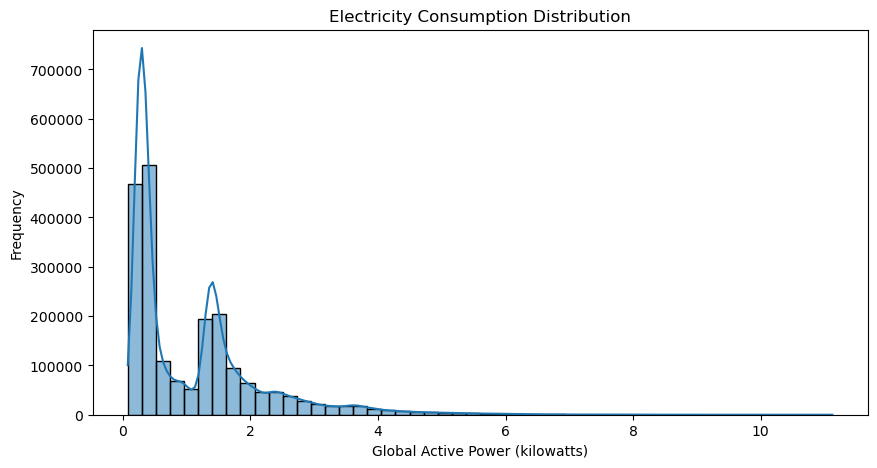

Model Trained Successfully.
MAE: 0.028665778831611432
MSE: 0.0018723809073724691
R^2 Score: 0.9983340969207901


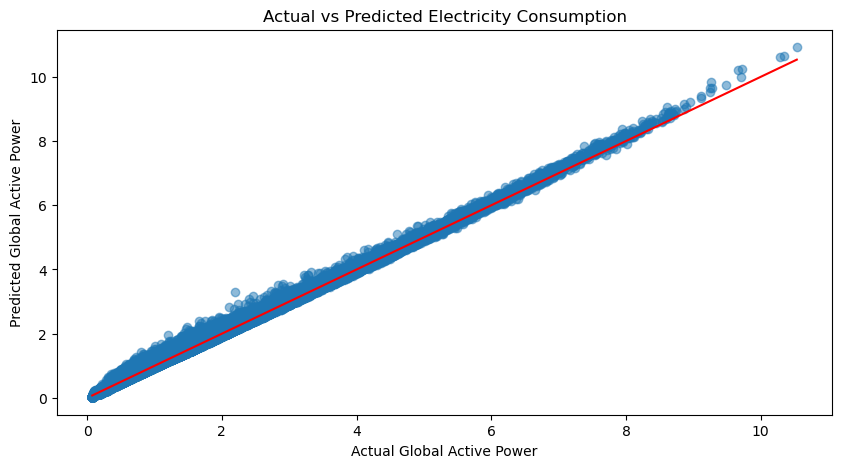

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

class ElectricityConsumption:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.model = None
        
    #For loading data from .csv file
    
    def load_data(self):
        self.df = pd.read_csv(self.file_path, delimiter=';', low_memory=False, na_values=['?'])
        self.df.to_csv('household_power_consumption.csv', index=False)
        print("Data Loaded Successfully.")

    #Displays the first five rows of the dataset.
    
    def display_head(self):
        if self.df is not None:
            print(self.df.head())
        else:
            print("Data not loaded. Call load_data() first.")

    #Displays dataset information.
    
    def get_info(self):
        if self.df is not None:
            self.df.info()
        else:
            print("Data not loaded. Call load_data() first.")

    #Returns statistical summary of the dataset.
    
    def get_statistics(self):
        if self.df is not None:
            print(self.df.describe())
        else:
            print("Data not loaded. Call load_data() first.")

    #Returns the count of missing values in each column.
    
    def check_missing_values(self):
        if self.df is not None:
            print(self.df.isnull().sum())
        else:
            print("Data not loaded. Call load_data() first.")

    #handling the missing values and transforming the date time columns to datatime format
    
    def preprocess_data(self):
        if self.df is not None:
            self.df.dropna(inplace=True)
            if 'Date' in self.df.columns:
                self.df['Date'] = pd.to_datetime(self.df['Date'], format='%d/%m/%Y')
            print("Data Preprocessing Completed.")
        else:
            print("Data not loaded. Call load_data() first.")

    #Generating histogram for the consumption
    
    def visualize_consumption(self):
        
        if self.df is not None:
            plt.figure(figsize=(10,5))
            sns.histplot(self.df['Global_active_power'].astype(float), bins=50, kde=True)
            plt.xlabel('Global Active Power (kilowatts)')
            plt.ylabel('Frequency')
            plt.title('Electricity Consumption Distribution')
            plt.show()
        else:
            print("Data not loaded. Call load_data() first.")

    #Function for training the model using linear regression and visualizing the predictions
    
    def train_model(self):
        if self.df is not None:
            features = ['Global_reactive_power', 'Voltage', 'Global_intensity']
            target = 'Global_active_power'
            
            self.df[features] = self.df[features].astype(float)
            self.df[target] = self.df[target].astype(float)
            
            X = self.df[features]
            y = self.df[target]
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            self.model = LinearRegression()
            self.model.fit(X_train, y_train)
            
            y_pred = self.model.predict(X_test)
            
            print("Model Trained Successfully.")
            print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
            print(f"MSE: {mean_squared_error(y_test, y_pred)}")
            print(f"R^2 Score: {r2_score(y_test, y_pred)}")
            
            # Visualization of predictions vs actual values
            plt.figure(figsize=(10,5))
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.xlabel('Actual Global Active Power')
            plt.ylabel('Predicted Global Active Power')
            plt.title('Actual vs Predicted Electricity Consumption')
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
            plt.show()
        else:
            print("Data not loaded. Call load_data() first.")


ec = ElectricityConsumption('household_power_consumption.txt')
ec.load_data()
ec.display_head()
ec.get_info()
ec.get_statistics()
ec.check_missing_values()
ec.preprocess_data()
ec.visualize_consumption()
ec.train_model()
